# second attempt - reverse prediction with radii

In [14]:
import numpy as np
import pandas as pd
from functions import *
from read_from_file_df import *
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [15]:
def find_loc(pixel, size):
    pixel = pixel-1
    x = pixel // size
    y = pixel % size
    return (x,y)

In [16]:
def calc_neighs(field, i, j,size, radii = 1):
    """ Calculate number of neighbors alive (assuming square field) """
    neighs = 0
    M = generate_twice_tuples(radii)
    for m in M:
        row_idx = m[0] + i
        col_idx = m[1] + j
        if row_idx<0: row_idx+=size
        if col_idx<0: col_idx+=size
        if row_idx>=size: row_idx-=size
        if col_idx>=size: col_idx-=size
        if field[row_idx*size+col_idx]:
            neighs += 1
    return neighs

In [17]:
def to_show(board,size):
    table = np.zeros((size, size, 3))
    for index, col in enumerate(board):
        color = int(board[col]) * -1 + 1
        i = index // size
        j = index % size
        table[i, j] = [color, color, color]
    return table

In [18]:
gen = 3
size = SIZE
name_df = f'{PATH_DF}\\{size}size_{AMOUNT_BOARDS}boards_{gen}gen_reverse'
reverse_df = pd.read_pickle(f'{name_df}.pkl')

In [19]:
new_columns = [f'Col_{i}' for i in range(1, gen*SIZE*SIZE + 1)]
reverse_df_sort = reverse_df.sort_values(by = new_columns).reset_index(drop=True)
for i in reverse_df_sort.columns:
    reverse_df_sort[i] = reverse_df_sort[i].astype(int)

In [20]:
pixel = 17
radii = 1
loc = find_loc(pixel, size)
print(loc)

(3, 1)


In [21]:
reverse_df['radius1'] = reverse_df.apply(lambda row: calc_neighs(row[:size*size],loc[0], loc[1],size,radii ), axis=1)
reverse_df['radius2'] = reverse_df.apply(lambda row: calc_neighs(row[size*size:size*size*2],loc[0], loc[1],size,radii ), axis=1)
reverse_df['radius3'] = reverse_df.apply(lambda row: calc_neighs(row[size*size*2:],loc[0], loc[1],size,radii ), axis=1)

C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:
C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:
C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


In [22]:
reverse_df

,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10,...,Col_69,Col_70,Col_71,Col_72,Col_73,Col_74,Col_75,radius1,radius2,radius3
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,1,1,1,1,1,3
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
2,0,0,0,1,1,0,0,0,0,0,...,1,0,1,0,1,1,1,2,4,4
3,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,2,4
4,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28491,1,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,4,2,2
28492,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,3,4,2
28493,0,0,1,1,0,0,0,1,1,0,...,0,0,1,1,0,0,0,3,3,4
28494,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,2,6,4


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\3009459553.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  color = int(board[col]) * -1 + 1


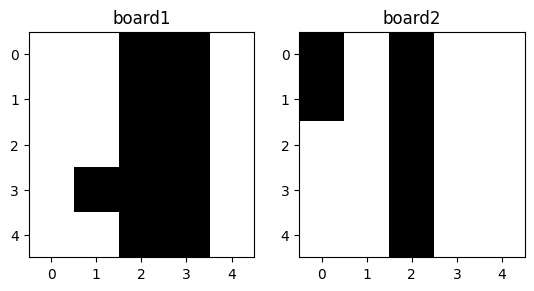

In [23]:
num_board = 28493

board1 = reverse_df.iloc[[num_board],0:size*size]
board2 = reverse_df.iloc[[num_board],size*size:size*size*2]

board1_to_show = to_show(board1,size)
board2_to_show = to_show(board2,size)
fig, axes = plt.subplots(1, 2)

# Plot the first image
axes[0].imshow(board1_to_show)
axes[0].set_title('board1')

# Plot the second image
axes[1].imshow(board2_to_show)
axes[1].set_title('board2')

# Show the images
plt.show()

In [24]:
reverse_df

,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10,...,Col_69,Col_70,Col_71,Col_72,Col_73,Col_74,Col_75,radius1,radius2,radius3
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,1,1,1,1,1,3
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
2,0,0,0,1,1,0,0,0,0,0,...,1,0,1,0,1,1,1,2,4,4
3,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,2,4
4,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28491,1,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,4,2,2
28492,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,3,4,2
28493,0,0,1,1,0,0,0,1,1,0,...,0,0,1,1,0,0,0,3,3,4
28494,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,2,6,4


In [25]:
# Step 1: Prepare Data
amount_features = (gen-1)*size*size #the previous boards
features = reverse_df_sort.iloc[:, :amount_features]

name_col = 'Col_' + str(amount_features + 1)  # Target: the first pixel in the board
target = reverse_df_sort[name_col]

#TODO: add general code for any amount of gen
features['radius1'] = features.apply(lambda row: calc_neighs(row[:size*size],loc[0], loc[1],size,radii ), axis=1)
features['radius2'] = features.apply(lambda row: calc_neighs(row[size*size:],loc[0], loc[1],size,radii ), axis=1)

# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=365)

print("len x train: ", len(X_train))
print("len x test: ",len(X_test))
print("len y train: ",len(y_train))
print("len y test: ",len(y_test))

dt = tree.DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                measure_error(y_test, y_test_pred, 'test')],
                                axis=1)

print(dt.tree_.node_count, dt.tree_.max_depth)
train_test_full_error

C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:
C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


len x train:  25646
len x test:  2850
len y train:  25646
len y test:  2850
13201 37


,train,test
accuracy,0.975942,0.610175
precision,0.990227,0.416244
recall,0.941066,0.433404
f1,0.965021,0.424650


In [26]:
depth_to_check = [4,5,6,7,8,9,10,15,20,30,50,100]

for i in depth_to_check:
    dt, node_count, max_depth, train_test_full_error  = dec_tree_df(X_train,y_train, X_test, y_test, i, 42)
    
    name_file = f"{PATH_MODELS}\\reverse_model2\\decision_tree_reverse_df_model2_{str(i)}.pkl"
    with open(name_file, 'wb') as file:
        pickle.dump(dt, file)
    
    print(node_count, max_depth)
    print(train_test_full_error)

31 4
              train      test
accuracy   0.676246  0.677193
precision  0.551523  0.516250
recall     0.438523  0.436575
f1         0.488574  0.473081
63 5
              train      test
accuracy   0.680808  0.681053
precision  0.563839  0.524503
recall     0.418952  0.418605
f1         0.480716  0.465608
127 6
              train      test
accuracy   0.686618  0.683860
precision  0.586438  0.534039
recall     0.377709  0.373150
f1         0.459479  0.439328
255 7
              train      test
accuracy   0.692857  0.678947
precision  0.596018  0.522694
recall     0.400487  0.377378
f1         0.479069  0.438306
503 8
              train      test
accuracy   0.703541  0.676140
precision  0.621235  0.517293
recall     0.408226  0.363636
f1         0.492694  0.427064
949 9
              train      test
accuracy   0.719878  0.668070
precision  0.657574  0.500000
recall     0.429124  0.355180
f1         0.519336  0.415328
1695 10
              train      test
accuracy   0.743469  0.66947

In [27]:
amount_features = (gen-1)* SIZE*SIZE #the previous boards
features = reverse_df_sort.iloc[:, :amount_features]
for i in range(SIZE*SIZE): # to any pixel in the expected board
    name_col = 'Col_' + str(i+amount_features + 1)
    target = reverse_df_sort[name_col]
    
    #TODO: add general code for any amount of gen
    loc = find_loc(pixel+1, size)
    features['radius1'] = features.apply(lambda row: calc_neighs(row[:size*size],loc[0], loc[1],size,radii ), axis=1)
    features['radius2'] = features.apply(lambda row: calc_neighs(row[size*size:],loc[0], loc[1],size,radii ), axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=613)
    dt, node_count, max_depth, train_test_full_error  = dec_tree_df(X_train,y_train, X_test, y_test, 10, 42)
    name_file = f"{PATH_MODELS}\\reverse2\\dt_r2_pixel_{str(i+1)}.pkl"
    with open(name_file, 'wb') as file:
        pickle.dump(dt, file)
    print(i)
    print(node_count, max_depth)
    print(train_test_full_error)

C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:
C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


0
1611 10
              train      test
accuracy   0.740856  0.649474
precision  0.698903  0.518302
recall     0.454606  0.345703
f1         0.550885  0.414763


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


1
1663 10
              train      test
accuracy   0.742338  0.663158
precision  0.692040  0.503794
recall     0.468362  0.344041
f1         0.558643  0.408867


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


2
1661 10
              train      test
accuracy   0.745418  0.673333
precision  0.721188  0.548246
recall     0.447728  0.376128
f1         0.552471  0.446163


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


3
1653 10
              train      test
accuracy   0.745847  0.667018
precision  0.692554  0.527457
recall     0.466189  0.369807
f1         0.557261  0.434783


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


4
1637 10
              train      test
accuracy   0.739881  0.671930
precision  0.691139  0.535871
recall     0.454321  0.371951
f1         0.548249  0.439112


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


5
1711 10
              train      test
accuracy   0.747836  0.660351
precision  0.711077  0.540029
recall     0.469611  0.362659
f1         0.565652  0.433918


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


6
1719 10
              train      test
accuracy   0.745301  0.644561
precision  0.710379  0.491597
recall     0.474576  0.350649
f1         0.569016  0.409329


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


7
1525 10
              train      test
accuracy   0.737113  0.682456
precision  0.689947  0.563235
recall     0.473407  0.386478
f1         0.561524  0.458408


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


8
1697 10
              train      test
accuracy   0.747056  0.654035
precision  0.708202  0.508221
recall     0.473526  0.341023
f1         0.567562  0.408163


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


9
1559 10
              train      test
accuracy   0.737542  0.658947
precision  0.685034  0.516824
recall     0.481143  0.385155
f1         0.565265  0.441379


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


10
1767 10
              train      test
accuracy   0.745340  0.638246
precision  0.704549  0.487324
recall     0.473012  0.341560
f1         0.566018  0.401625


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


11
1729 10
              train      test
accuracy   0.748928  0.672281
precision  0.695960  0.537666
recall     0.487266  0.369543
f1         0.573209  0.438026


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


12
1343 10
              train      test
accuracy   0.732434  0.670175
precision  0.695084  0.557789
recall     0.420332  0.330030
f1         0.523869  0.414695


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


13
1711 10
              train      test
accuracy   0.750877  0.654737
precision  0.696895  0.519369
recall     0.482814  0.358061
f1         0.570430  0.423888


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


14
1617 10
              train      test
accuracy   0.744950  0.676491
precision  0.685668  0.521084
recall     0.481293  0.364211
f1         0.565584  0.428748


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


15
1533 10
              train      test
accuracy   0.733565  0.652632
precision  0.687932  0.538012
recall     0.458822  0.353167
f1         0.550490  0.426419


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


16
1687 10
              train      test
accuracy   0.747251  0.660702
precision  0.700688  0.533237
recall     0.470416  0.364265
f1         0.562913  0.432845


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


17
1381 10
              train      test
accuracy   0.731888  0.670526
precision  0.678941  0.537879
recall     0.445298  0.358948
f1         0.537841  0.430564


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


18
1553 10
              train      test
accuracy   0.738556  0.660351
precision  0.682955  0.506747
recall     0.460164  0.345957
f1         0.549849  0.411192


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


19
1631 10
              train      test
accuracy   0.745613  0.658246
precision  0.691942  0.488604
recall     0.487701  0.358038
f1         0.572141  0.413253


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


20
1737 10
              train      test
accuracy   0.742923  0.656842
precision  0.701502  0.517293
recall     0.474120  0.343656
f1         0.565822  0.412965


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


21
1517 10
              train      test
accuracy   0.744327  0.656140
precision  0.686393  0.520223
recall     0.493357  0.369673
f1         0.574082  0.432213


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


22
1573 10
              train      test
accuracy   0.742416  0.671930
precision  0.701053  0.551302
recall     0.465320  0.359281
f1         0.559365  0.435045


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


23
1391 10
              train      test
accuracy   0.739258  0.659298
precision  0.684843  0.518293
recall     0.436443  0.341709
f1         0.533129  0.411872


C:\Users\דרור\AppData\Local\Temp\ipykernel_600\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


24
1713 10
              train      test
accuracy   0.747329  0.662456
precision  0.701507  0.540029
recall     0.478971  0.364798
f1         0.569263  0.435446
